<a href="https://colab.research.google.com/github/LastResort/114_bi_homework/blob/main/5113029006_week2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b>取得股價資料</b>

## 使用 Yahoo Finance 取得資料

In [1]:
!pip install yfinance

In [2]:
import yfinance as yf # yahoo finance 套件
import pandas as pd # 結構化資料處理套件
import datetime as dt # 時間套件

In [5]:
# 輸入股票代號(台股要加.tw才會抓的到資料)
stock_id = "6931.tw"
# stock_id = "2357.tw"
# stock_id = "AAPL"
# stock_id = "NVDA"

'''今天往前算幾天'''
# 資料結束時間
end = dt.date.today()
# 抓取半年資料（現在-過去180天）
start = end - dt.timedelta(days=360)

'''抓取特定時間'''
# start = dt.datetime(2024, 1, 1)  # 指定的開始日期
# end = dt.datetime(2024, 6, 30)    # 指定的結束日期


# 參數1: 股票代號, 參數2: 開始時間, 參數3: 結束時間
df = yf.download(stock_id, start=start, end=end).reset_index()

# 刪除 Ticker 欄位並取代
df.columns = df.columns.droplevel('Ticker')

df

/tmp/ipython-input-540551493.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(stock_id, start=start, end=end).reset_index()
[*********************100%***********************]  1 of 1 completed


Price,Date,Close,High,Low,Open,Volume
0,2025-03-27,69.565453,70.553598,69.367819,70.454785,53150
1,2025-03-28,69.170197,70.355968,68.676124,70.355968,108326
2,2025-03-31,66.798645,68.182050,66.699832,66.699832,86360
3,2025-04-01,67.292717,67.786790,66.403384,66.798644,44000
4,2025-04-02,67.095093,67.292719,66.996280,67.292719,28020
...,...,...,...,...,...,...
118,2025-09-16,50.299999,51.900002,50.200001,51.900002,18295
119,2025-09-17,52.000000,53.000000,50.900002,50.900002,644200
120,2025-09-18,51.900002,52.099998,51.200001,52.000000,46021
121,2025-09-19,51.200001,51.900002,51.000000,51.900002,48210


# <b>1. 技術指標的計算</b>
移動動平均線（MA）、相對強弱指數（RSI）、平滑異同移動平均線（MACD）


## 1.1 計算簡單移動平均線（SMA）

In [6]:
# 計算8日 SMA
df['8_SMA'] = df['Close'].rolling(window=8).mean()

# 計算13日 SMA
df['13_SMA'] = df['Close'].rolling(window=13).mean()

# 計算20日 SMA
df['20_SMA'] = df['Close'].rolling(window=20).mean()

# 列印最後筆數
df.tail()

Price,Date,Close,High,Low,Open,Volume,8_SMA,13_SMA,20_SMA
118,2025-09-16,50.299999,51.900002,50.200001,51.900002,18295,50.932206,50.328886,50.162623
119,2025-09-17,52.000000,53.000000,50.900002,50.900002,644200,51.246794,50.530153,50.268505
120,2025-09-18,51.900002,52.099998,51.200001,52.000000,46021,51.311942,50.792796,50.359411
121,2025-09-19,51.200001,51.900002,51.000000,51.900002,48210,51.077589,50.940199,50.427788
122,2025-09-22,51.500000,52.200001,51.400002,51.500000,39000,51.030383,51.064634,50.518647


## 1.2 計算相對強弱指數（RSI）

<img src="https://images.stockfeel.com.tw/stockfeelimage/2015/10/%E6%95%99%E4%BD%A0%E7%9C%8B%E6%87%82-RSI-%E7%9B%B8%E5%B0%8D%E5%BC%B7%E5%BC%B1%E6%8C%87%E6%A8%99-01.jpg" alt="rsi" width="500"/>

<img src="https://images.stockfeel.com.tw/stockfeelimage/2015/10/%E6%95%99%E4%BD%A0%E7%9C%8B%E6%87%82-RSI-%E7%9B%B8%E5%B0%8D%E5%BC%B7%E5%BC%B1%E6%8C%87%E6%A8%99-02.jpg" alt="rs" width="500"/>

In [7]:
# 計算每個交易日的價格變動，即當天收盤價與前一天收盤價的差異
df['Change'] = df['Close'] - df['Close'].shift(1)

# 將變動值中的正數部分視為“Gain”（增益），如果變動為負則記為0
df['Gain'] = df['Change'].apply(lambda x: x if x > 0 else 0)

# 將變動值中的負數部分視為“Loss”（損失），取其絕對值，如果變動為正則記為0
df['Loss'] = df['Change'].apply(lambda x: abs(x) if x < 0 else 0)

df.tail()

# 計算過去14個交易日的平均增益
df['Avg Gain'] = df['Gain'].rolling(window=14).mean()

# 計算過去14個交易日的平均損失
df['Avg Loss'] = df['Loss'].rolling(window=14).mean()

# 計算相對強弱指數的相對強度（RS），即平均增益與平均損失的比值
df['RS'] = df['Avg Gain'] / df['Avg Loss']

# 計算相對強弱指數（RSI），使用RS公式計算出來
df['RSI'] = 100 - (100 / (1 + df['RS']))

# 顯示最後幾行的數據
df.tail()

Price,Date,Close,High,Low,Open,Volume,8_SMA,13_SMA,20_SMA,Change,Gain,Loss,Avg Gain,Avg Loss,RS,RSI
118,2025-09-16,50.299999,51.900002,50.200001,51.900002,18295,50.932206,50.328886,50.162623,-0.580002,0.000000,0.580002,0.413311,0.383479,1.077793,51.872012
119,2025-09-17,52.000000,53.000000,50.900002,50.900002,644200,51.246794,50.530153,50.268505,1.700001,1.700001,0.000000,0.534740,0.372790,1.434426,58.922553
120,2025-09-18,51.900002,52.099998,51.200001,52.000000,46021,51.311942,50.792796,50.359411,-0.099998,0.000000,0.099998,0.534740,0.354992,1.506344,60.101246
121,2025-09-19,51.200001,51.900002,51.000000,51.900002,48210,51.077589,50.940199,50.427788,-0.700001,0.000000,0.700001,0.534740,0.340857,1.568808,61.071445
122,2025-09-22,51.500000,52.200001,51.400002,51.500000,39000,51.030383,51.064634,50.518647,0.299999,0.299999,0.000000,0.499160,0.340857,1.464425,59.422578


## 1.3 計算平滑異同移動平均線（MACD）

In [8]:
'''
第一日
# 平滑係數公式： α = 2 / (span + 1) = 2 / (span + 1)
# α = 2 / (8 + 1) = 2 / (8 + 1) ≈ 0.2222
# 0.2222 * 770.0 + (1-0.2222) * 776.0 = 171.094 + 603.5728 = 774.6668
'''

# 計算8天的指數移動平均線（EMA），並將其存儲在 'EMA_8' 列中
# adjust=False 表示在計算 EMA 時，只考慮當前值和前一個 EMA 的遞歸計算方式，而不考慮所有歷史數據
df['EMA_8'] = df['Close'].ewm(span=8, adjust=False).mean()

# 計算13天的指數移動平均線（EMA），並將其存儲在 'EMA_13' 列中
df['EMA_13'] = df['Close'].ewm(span=13, adjust=False).mean()

# 計算MACD線：8天EMA減去13天EMA，並將其存儲在 'MACD' 列中
df['MACD'] = df['EMA_8'] - df['EMA_13']

# 顯示DataFrame的最後幾行數據
df.head(3)

Price,Date,Close,High,Low,Open,Volume,8_SMA,13_SMA,20_SMA,Change,Gain,Loss,Avg Gain,Avg Loss,RS,RSI,EMA_8,EMA_13,MACD
0,2025-03-27,69.565453,70.553598,69.367819,70.454785,53150,NaN,NaN,NaN,NaN,0.0,0.000000,NaN,NaN,NaN,NaN,69.565453,69.565453,0.000000
1,2025-03-28,69.170197,70.355968,68.676124,70.355968,108326,NaN,NaN,NaN,-0.395256,0.0,0.395256,NaN,NaN,NaN,NaN,69.477618,69.508987,-0.031370
2,2025-03-31,66.798645,68.182050,66.699832,66.699832,86360,NaN,NaN,NaN,-2.371552,0.0,2.371552,NaN,NaN,NaN,NaN,68.882291,69.121796,-0.239505


# <b>2. 資料可視化</b>
K 線型態的捕捉

## 2.1 可視化收盤價折線圖

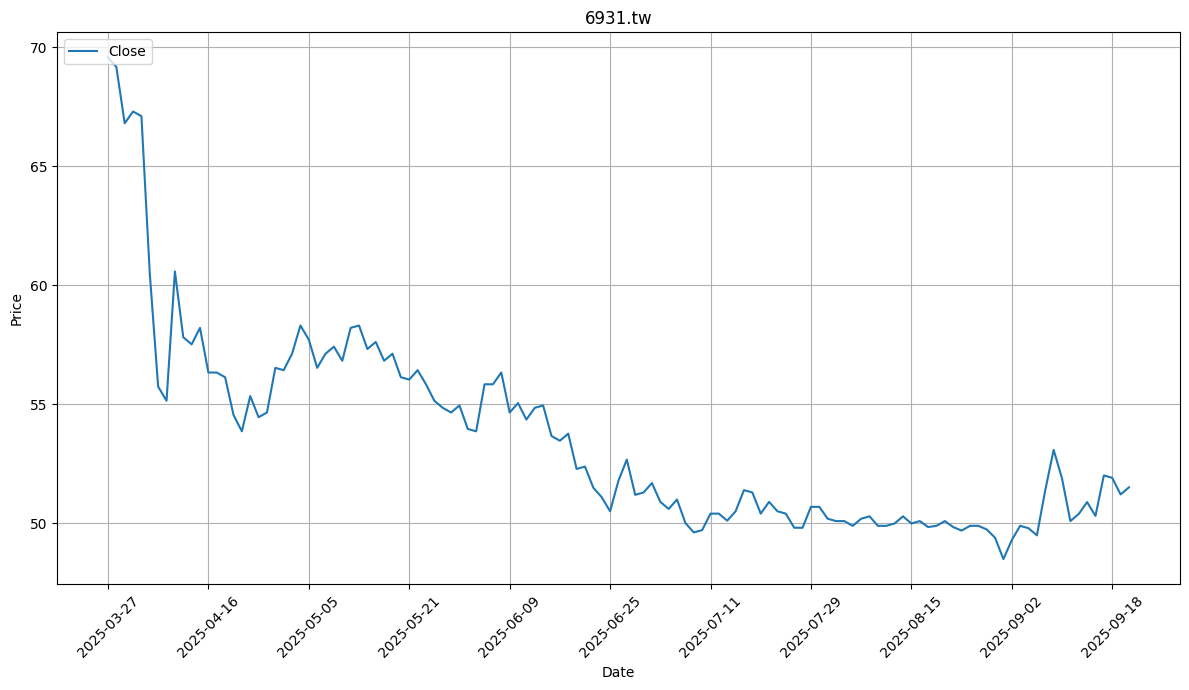

In [9]:
import matplotlib.pyplot as plt

# 畫布尺寸大小設定
plt.figure(figsize=(12, 7))

# 設定要繪製的資料欄位
plt.plot(df['Close'], label='Close')

# 設定 x 軸的時間
num = 10
date = df["Date"].dt.strftime('%Y-%m-%d')
plt.xticks(date[::len(date)//num].index,  # 設定在 x 軸上顯示標籤的位置（索引），這些位置間隔為 len(date)//num
           date[::len(date)//num],  # 設定顯示在 x 軸上的日期標籤，數量為 num，間隔為 len(date)//num
           rotation = 45) # 讓日期標籤旋轉 45 度，以避免標籤之間重疊，提高可讀性

# 設定圖表的標題，x 軸和 y 軸的標籤
plt.title(f'{stock_id}')   # 將股票代號設為圖標
plt.xlabel('Date')         # x 軸標籤
plt.ylabel('Price')  # y 軸標籤
plt.legend(loc='upper left') # 在左上角顯示圖例
plt.grid(True) # 在圖上顯示網格
plt.tight_layout()  # 自動調整圖表中的間距，避免元素之間的重疊

# 顯示圖表
plt.show()

## 2.2 加入技術指標

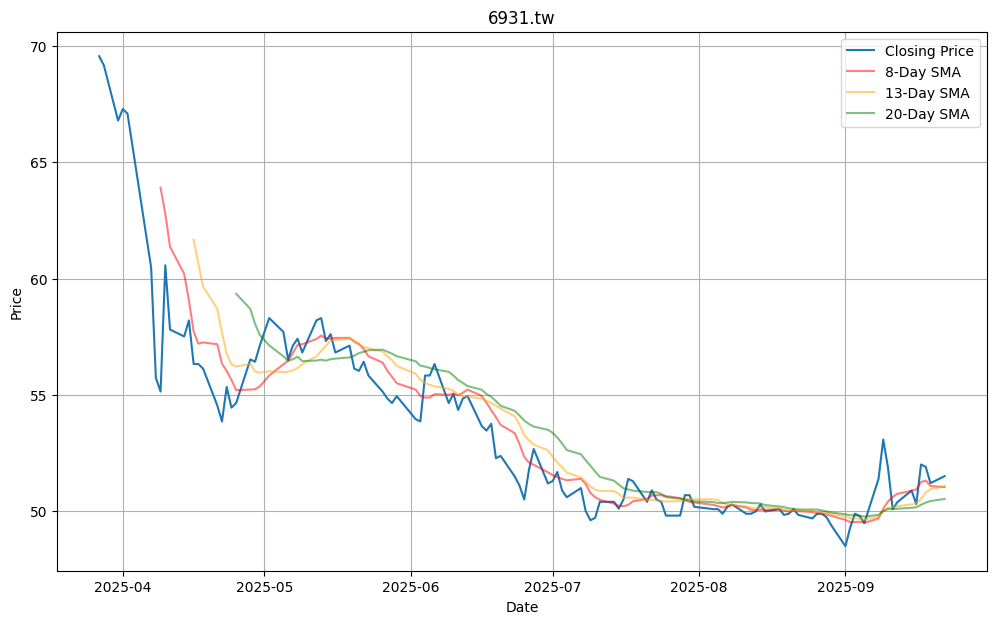

In [10]:
# 畫布尺寸大小設定
plt.figure(figsize=(12, 7))

# 設定要繪製的資料欄位
plt.plot(df['Date'], df['Close'], label='Closing Price')

# 8 天的 SMA
plt.plot(df['Date'], df['8_SMA'], label='8-Day SMA', color='red', alpha=.5)

# 13 天的 SMA
plt.plot(df['Date'], df['13_SMA'], label='13-Day SMA', color='orange', alpha=.5)

# 20 天的 SMA
plt.plot(df['Date'], df['20_SMA'], label='20-Day SMA', color='green', alpha=.5)

# 將股票代號設為圖標
plt.title(f'{stock_id}')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

plt.show()

## 2.3 K 線

In [11]:
!pip install mplfinance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 4.8 MB/s eta 0:00:00


In [12]:
# 將原始的 dataframe 再建立一個出來
kplot_df = df.set_index('Date')
kplot_df['2025-08-01':'2025-09-17'].tail()

Price,Close,High,Low,Open,Volume,8_SMA,13_SMA,20_SMA,Change,Gain,Loss,Avg Gain,Avg Loss,RS,RSI,EMA_8,EMA_13,MACD
Date,,,,,,,,,,,,,,,,,,
2025-09-11,50.081882,51.877646,50.081882,51.877646,60000,50.605647,50.170135,50.079387,-1.795765,0.000000,1.795765,0.370555,0.352740,1.050505,51.231530,50.740703,50.491227,0.249476
2025-09-12,50.381176,51.877647,49.882352,50.181646,94295,50.742823,50.208506,50.099340,0.299294,0.299294,0.000000,0.391933,0.342051,1.145833,53.398056,50.660808,50.475505,0.185303
2025-09-15,50.880001,50.880001,49.383530,50.381178,82072,50.867529,50.285248,50.139246,0.498825,0.498825,0.000000,0.413311,0.342051,1.208334,54.716993,50.709518,50.533290,0.176227
2025-09-16,50.299999,51.900002,50.200001,51.900002,18295,50.932206,50.328886,50.162623,-0.580002,0.000000,0.580002,0.413311,0.383479,1.077793,51.872012,50.618513,50.499963,0.118551
2025-09-17,52.000000,53.000000,50.900002,50.900002,644200,51.246794,50.530153,50.268505,1.700001,1.700001,0.000000,0.534740,0.372790,1.434426,58.922553,50.925510,50.714254,0.211257


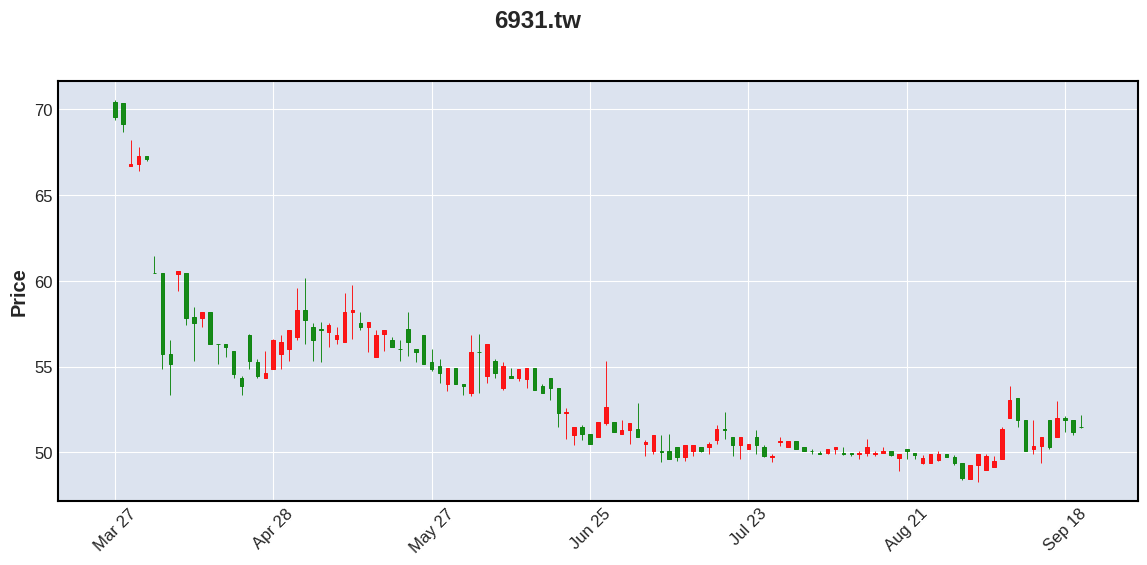

In [13]:
import mplfinance as mpf
# 設置繪圖風格
my_color = mpf.make_marketcolors(up='r', down='g', inherit=True)
my_style = mpf.make_mpf_style(base_mpf_style='default',
                marketcolors=my_color)

# 使用 mplfinance 繪製 K 線圖
mpf.plot(kplot_df, type='candle', style=my_style, title=f'{stock_id}', figsize=(15, 6))

## 2.4 捕捉 Hammer 型態

錘形線（Hammer）

<img src="https://drive.google.com/uc?id=1M5t0g5kKCm2xfzRaFHfKt_CT41XSRjgb" alt="drawing" width="600"/>

In [14]:
# 計算 K 線長度 = abs(收盤-開盤)
df['body_length'] = abs(df['Close'] - df['Open'])

# 計算下影線長度 = abs(最高-最小)
df['lower_shadow'] = abs(df['Low'] - df[['Open', 'Close']].min(axis=1))

# 計算上影線長度 = abs(最高-最小)
df['upper_shadow'] = abs(df['High'] - df[['Open', 'Close']].max(axis=1))

#print('df',df)
# 定義 Hammer 型態的條件
hammer_condition = (
    (df['lower_shadow'] > 2 * df['body_length']) &  # 下影線長於實體的两倍
    (df['upper_shadow'] < df['body_length'] * 0.1) &  # 上影線很短
    (df['body_length'] < (df['High'] - df['Low']) * 0.4)  # 實體相對較小
)

# 提取 Hammer 型態
hammer_df = df[hammer_condition]
hammer_df.set_index('Date', inplace=True)

hammer_df

Price,Close,High,Low,Open,Volume,8_SMA,13_SMA,20_SMA,Change,Gain,...,Avg Gain,Avg Loss,RS,RSI,EMA_8,EMA_13,MACD,body_length,lower_shadow,upper_shadow
Date,,,,,,,,,,,,,,,,,,,,,
2025-04-10,60.573326,60.573326,59.387551,60.375696,134220,62.784305,NaN,NaN,5.434799,5.434799,...,NaN,NaN,NaN,NaN,61.767533,63.727840,-1.960307,0.197630,0.988146,0.0
2025-04-18,56.126675,56.324305,55.533789,56.324305,26000,57.250689,59.645992,NaN,-0.197628,0.000000,...,0.472898,1.432811,0.330049,24.814823,57.871878,59.590392,-1.718514,0.197630,0.592886,0.0
2025-05-15,57.608891,57.608891,55.830229,57.312448,136246,57.411263,57.335251,56.531813,0.296440,0.296440,...,0.472898,0.247036,1.914287,65.686286,57.472368,57.406685,0.065683,0.296443,1.482218,0.0
2025-05-19,57.114819,57.114819,55.929043,56.917189,69000,57.448318,57.411263,56.605923,0.296444,0.296444,...,0.345851,0.303502,1.139535,53.260874,57.279877,57.292952,-0.013075,0.197630,0.988146,0.0
2025-05-23,55.830231,56.027861,55.237345,56.027861,128015,56.657802,57.008403,56.917190,-0.592884,0.000000,...,0.239978,0.374083,0.641509,39.080445,56.520766,56.739780,-0.219015,0.197630,0.592886,0.0
2025-06-03,53.853939,53.952752,53.359866,53.952752,40010,54.953250,55.640201,56.250191,-0.098812,0.000000,...,0.091756,0.409374,0.224137,18.309812,54.851777,55.356776,-0.504999,0.098813,0.494073,0.0
2025-07-02,51.680016,51.680016,50.494240,51.284760,39000,51.457685,52.090477,53.157295,0.395256,0.395256,...,0.225863,0.451724,0.500001,33.333360,51.788927,52.228078,-0.439150,0.395256,0.790520,0.0
2025-08-08,50.281414,50.281414,49.882354,50.181647,33000,50.256470,50.264309,50.394193,0.099770,0.099770,...,0.126505,0.198172,0.638357,38.963249,50.203576,50.284301,-0.080725,0.099767,0.299293,0.0
2025-08-20,49.882351,49.882351,48.884704,49.682821,75004,49.975882,50.024325,50.117678,0.049881,0.049881,...,0.067698,0.124707,0.542859,35.185264,49.992765,50.060637,-0.067872,0.199530,0.798117,0.0


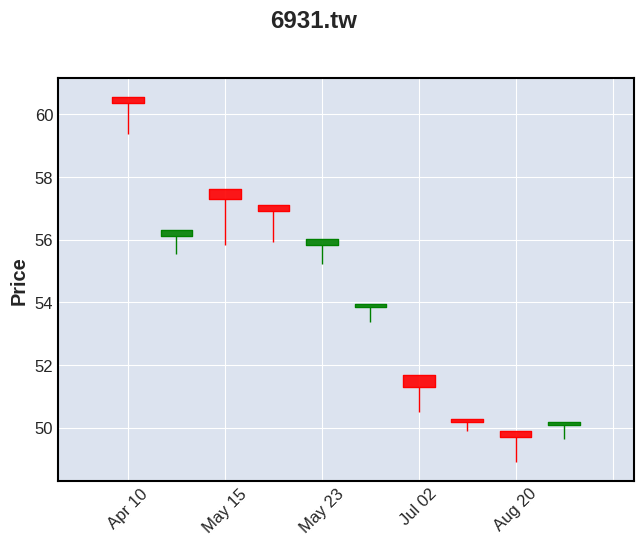

In [15]:
mpf.plot(hammer_df, type='candle', style=my_style, title=f'{stock_id}')

## 2.5 捕捉 Doji 型態

十字線（Doji）

<img src="https://drive.google.com/uc?id=1BDfcn8ZmMVgl0Xlku7mSD338WHeffrgc" alt="drawing" width="600"/>

In [16]:
# 計算 K 線長度
df['body_length'] = abs(df['Close'] - df['Open'])

# 定義Doji型態的條件
# 一般來說，body 長度 如果 小於等於 (最高價-最低價) * 0.1
doji_condition = (
    df['body_length'] <= (df['High'] - df['Low']) * 0.1  # 中間區域非常小
)

# 提取Doji形态
doji_df = df[doji_condition]
doji_df.set_index('Date', inplace=True)

doji_df

Price,Close,High,Low,Open,Volume,8_SMA,13_SMA,20_SMA,Change,Gain,...,Avg Gain,Avg Loss,RS,RSI,EMA_8,EMA_13,MACD,body_length,lower_shadow,upper_shadow
Date,,,,,,,,,,,,,,,,,,,,,
2025-03-31,66.798645,68.182050,66.699832,66.699832,86360,NaN,NaN,NaN,-2.371552,0.000000,...,NaN,NaN,NaN,NaN,68.882291,69.121796,-0.239505,0.098813,0.000000,1.383405
2025-04-07,60.474518,61.462664,60.474518,60.474518,149001,NaN,NaN,NaN,-6.620575,0.000000,...,NaN,NaN,NaN,NaN,66.491311,67.446329,-0.955019,0.000000,0.000000,0.988146
2025-04-17,56.324303,56.324303,55.138527,56.324303,29296,57.201281,60.649340,NaN,0.000000,0.000000,...,0.472898,1.418695,0.333333,25.000007,58.370508,60.167679,-1.797171,0.000000,1.185776,0.000000
2025-05-07,57.114819,57.608891,55.237344,57.213635,110000,56.793671,56.050662,56.526872,0.592888,0.592888,...,0.430549,0.374084,1.150943,53.508767,56.870440,57.059620,-0.189180,0.098817,1.877474,0.395256
2025-05-13,58.300594,59.782813,56.620746,58.201781,179096,57.547132,56.886785,56.512050,0.098812,0.098812,...,0.557596,0.239978,2.323529,69.911503,57.467908,57.383073,0.084835,0.098813,1.581035,1.482218
2025-05-21,56.027859,56.521932,55.336156,56.027859,51325,57.188931,57.160426,56.793671,-0.098816,0.000000,...,0.296443,0.374083,0.792453,44.210523,56.802332,56.969415,-0.167083,0.000000,0.691703,0.494073
2025-06-05,55.830231,56.917189,53.458680,55.830231,103100,54.879139,55.427370,56.151377,0.000000,0.000000,...,0.211745,0.338793,0.625000,38.461546,55.238326,55.482387,-0.244060,0.000000,2.371551,1.086959
2025-06-20,52.371719,52.569349,50.790688,52.272906,122080,53.705715,54.408819,54.525877,0.098816,0.098816,...,0.275270,0.388201,0.709092,41.489387,53.502166,53.991129,-0.488963,0.098813,1.482218,0.197630
2025-07-08,50.000172,50.988317,49.407286,50.098988,48430,51.161242,51.269557,52.188912,-0.988144,0.000000,...,0.225862,0.494073,0.457143,31.372560,50.998246,51.465971,-0.467725,0.098817,0.592886,0.889329


In [17]:
doji_df.index

DatetimeIndex(['2025-03-31', '2025-04-07', '2025-04-17', '2025-05-07',
               '2025-05-13', '2025-05-21', '2025-06-05', '2025-06-20',
               '2025-07-08', '2025-07-18', '2025-08-05', '2025-09-22'],
              dtype='datetime64[ns]', name='Date', freq=None)

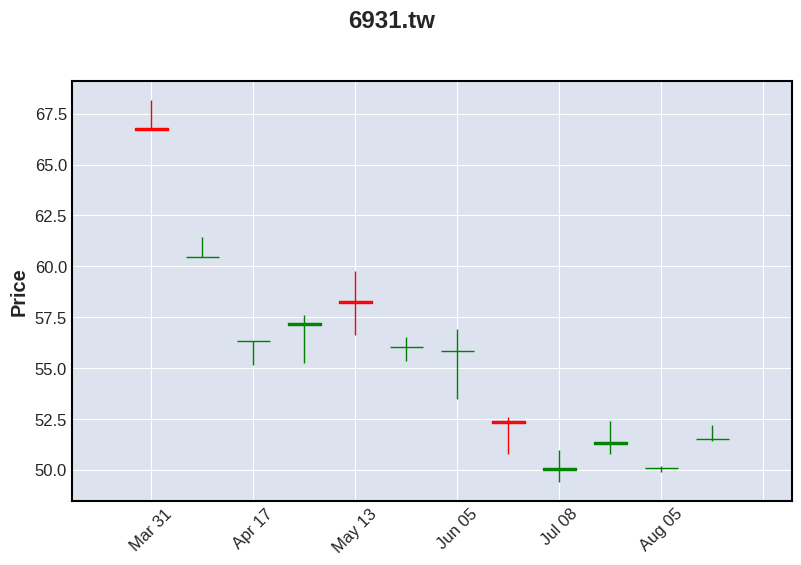

In [18]:
mpf.plot(doji_df, type='candle', style=my_style, title=f'{stock_id}', figsize=(10, 6))

# <b>3. 機器學習預測股價漲跌</b>
技術指標當特徵，用線性回歸、決策樹、隨機森林預測股價漲跌

## 3.1 資料前處理

In [19]:
import numpy as np  # 引入 numpy，用於數據處理和數值運算
from sklearn.model_selection import train_test_split  # 引入 train_test_split，用於將數據集拆分為訓練集和測試集
from sklearn.metrics import mean_squared_error  # 引入 mean_squared_error 用於評估模型性能

In [20]:
# 標籤: 預測未來1天的價格，舉例說明:用技術指標預測隔天的收盤價
n = 1
df['Future_Price'] = df['Close'].shift(-n)

# 去除缺失值
df.dropna(inplace=True)

# 使用特徵
X = df[['20_SMA', 'RSI', 'MACD']]

# 標籤（未來價格）
y = df['Future_Price']

X.shape, y.shape

((103, 3), (103,))

In [21]:
# 將數據集 X 和標籤 y 拆分為訓練集和測試集
# test_size=0.2 表示測試集佔全部數據的 20% --> 80% 的資料作為訓練，20% 的資料作為測試
# shuffle=False 表示在拆分數據時不打亂原始數據的順序
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# 查看拆分後訓練集和測試集的形狀
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((82, 3), (21, 3), (82,), (21,))

## 3.2 線性回歸（Linear Regression）

In [22]:
# 引入線性回歸模型
from sklearn.linear_model import LinearRegression

# 建立並訓練線性回歸模型
model = LinearRegression()
model.fit(X_train, y_train)

# 預測
y_pred = model.predict(X_test)

# 評估
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"線性回歸模型RMSE: {rmse:.2f}")

# 使用模型進行未來價格走勢預測
future_pred = model.predict(X[-1:])  # 使用最新的數據進行預測
print(f"線性回歸模型預測未來{n}天的價格: {future_pred[0]:.2f}")

線性回歸模型RMSE: 0.92
線性回歸模型預測未來1天的價格: 51.35


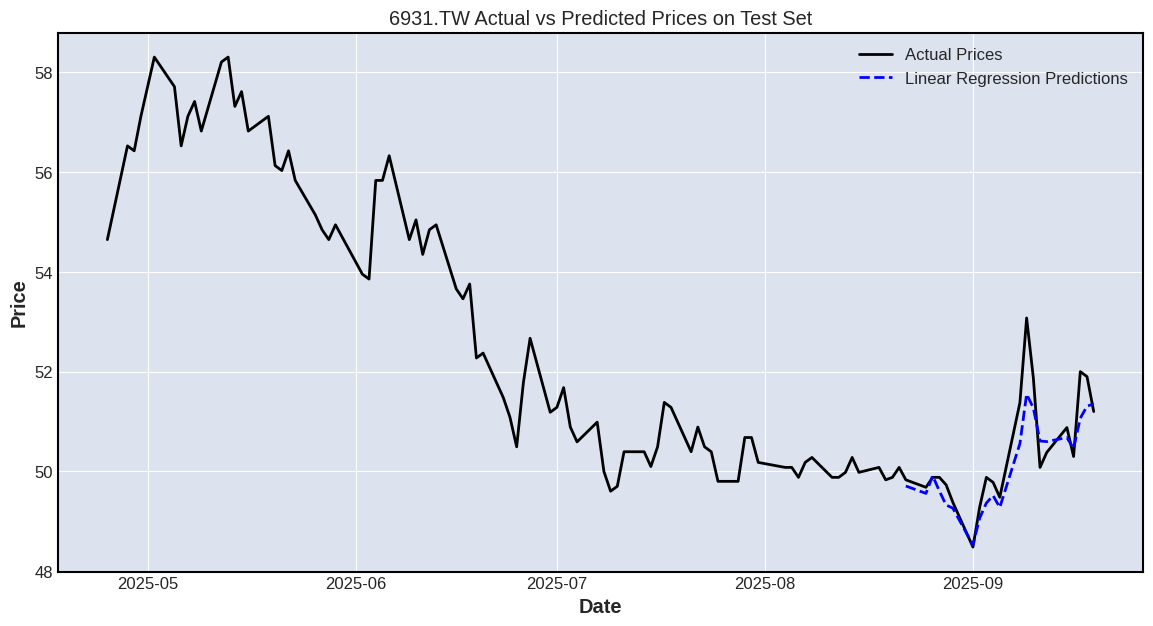

In [24]:
# 畫出測試集的實際價格與預測價格走勢圖
plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Close'], label='Actual Prices', color='black', linewidth=2)
plt.plot(df['Date'][-len(y_test):], y_pred, label='Linear Regression Predictions', linestyle='--', color='blue')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('6931.TW Actual vs Predicted Prices on Test Set')
plt.legend()
plt.grid(True)
plt.show()

## 3.2 決策樹（Decision Tree）

In [25]:
from sklearn.tree import DecisionTreeRegressor

# 建立並訓練決策數模型
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

# 預測
y_pred = model.predict(X_test)

# 評估
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"決策樹模型RMSE: {rmse:.2f}")

future_pred = model.predict(X[-1:])
print(f"決策樹模型預測未來{n}天的價格: {future_pred[0]:.2f}")

決策樹模型RMSE: 1.09
決策樹模型預測未來1天的價格: 50.68


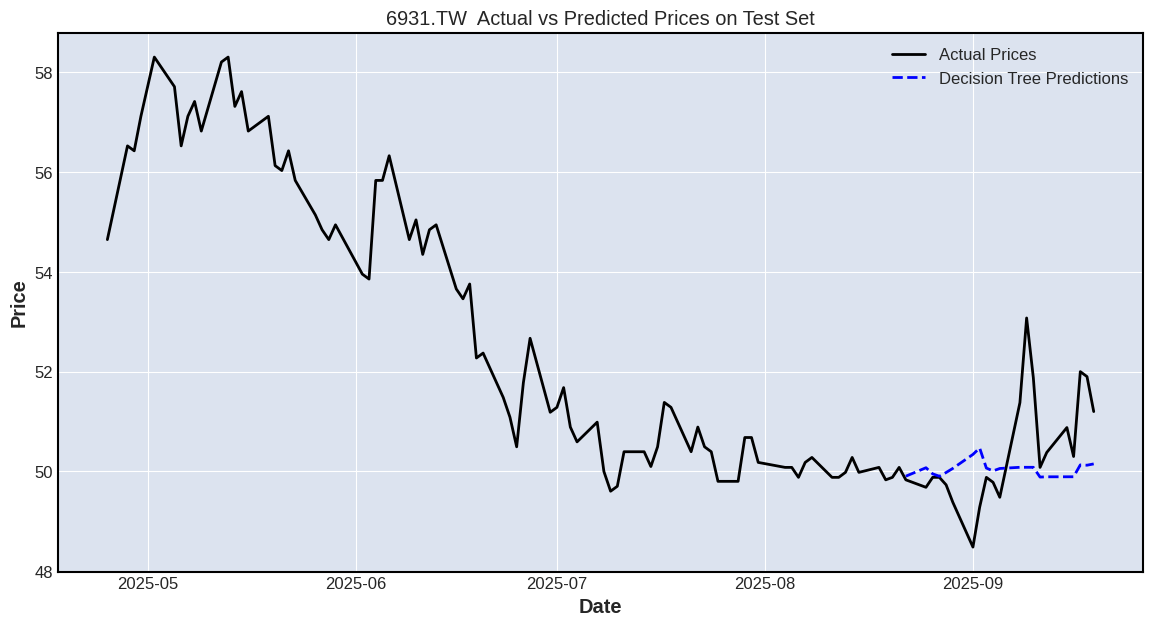

In [29]:
# 畫出測試集的實際價格與預測價格走勢圖
plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Close'], label='Actual Prices', color='black', linewidth=2)
plt.plot(df['Date'][-len(y_test):], y_pred, label='Decision Tree Predictions', linestyle='--', color='blue')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('6931.TW  Actual vs Predicted Prices on Test Set')
plt.legend()
plt.grid(True)
plt.show()

## 3.3 隨機森林（Random Forest）

In [38]:
# 引入隨機森林模型
from sklearn.ensemble import RandomForestRegressor

# 建立並訓練決策數模型
model = RandomForestRegressor()
model.fit(X_train, y_train)

# 預測
y_pred = model.predict(X_test)

# 評估
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"隨機森林模型RMSE: {rmse:.2f}")

future_pred = model.predict(X[-1:])
print(f"隨機森林模型預測未來{n}天的價格: {future_pred[0]:.2f}")

隨機森林模型RMSE: 1.22
隨機森林模型預測未來1天的價格: 50.10


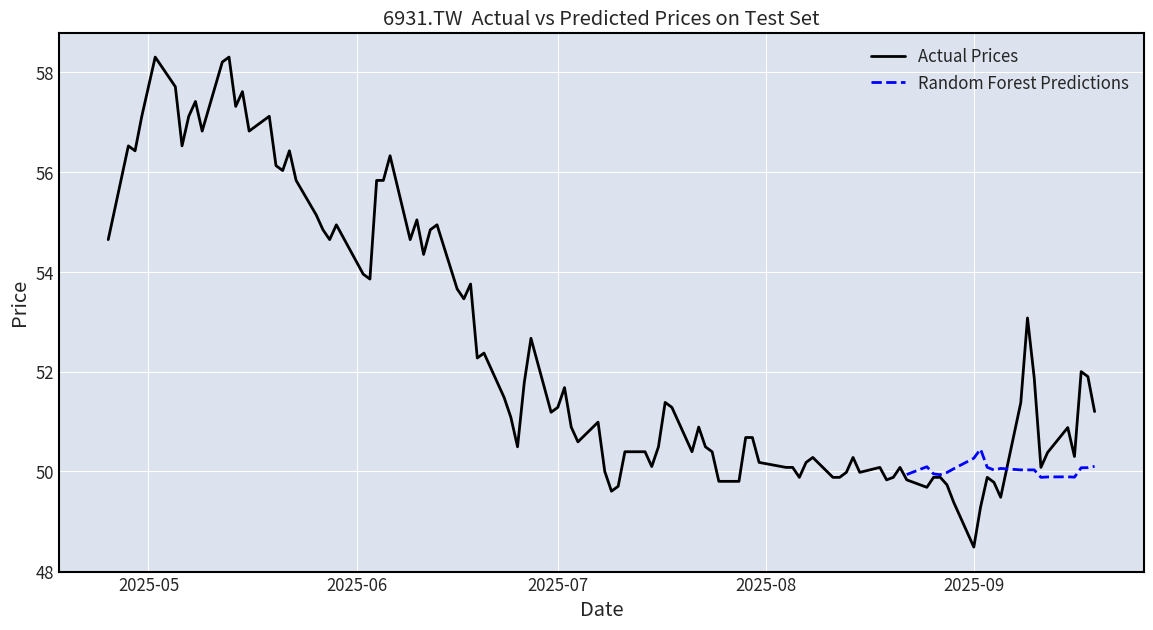

In [39]:
# 畫出測試集的實際價格與預測價格走勢圖
plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Close'], label='Actual Prices', color='black', linewidth=2)
plt.plot(df['Date'][-len(y_test):], y_pred, label='Random Forest Predictions', linestyle='--', color='blue')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('6931.TW  Actual vs Predicted Prices on Test Set')
plt.legend()
plt.grid(True)
plt.show()

# 3.4 支持向量機回歸 (Support Vector Machine for Regression, SVR)

In [40]:
# 引入必要的函式庫
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
import numpy as np

# 建立並訓練 SVR 模型
# kernel='rbf' 是最常用的核函數，適合處理非線性關係
model = SVR(kernel='rbf')
model.fit(X_train, y_train)

# 預測
y_pred = model.predict(X_test)

# 評估模型
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"SVR 模型RMSE: {rmse:.2f}")

# 預測未來值
future_pred = model.predict(X[-1:])
print(f"SVR 模型預測未來{n}天的價格: {future_pred[0]:.2f}")

SVR 模型RMSE: 1.60
SVR 模型預測未來1天的價格: 52.97


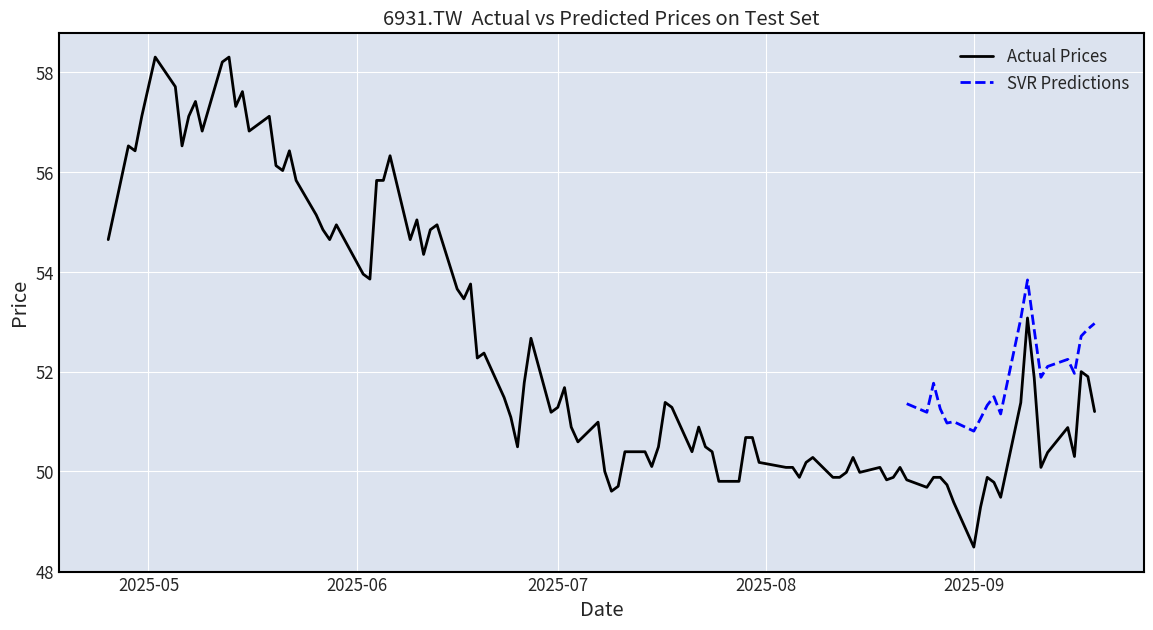

In [41]:
# 畫出測試集的實際價格與預測價格走勢圖
plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Close'], label='Actual Prices', color='black', linewidth=2)
plt.plot(df['Date'][-len(y_test):], y_pred, label='SVR Predictions', linestyle='--', color='blue')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('6931.TW  Actual vs Predicted Prices on Test Set')
plt.legend()
plt.grid(True)
plt.show()

# 補充：在 Colab 上使用中文字體

In [31]:
# Colab 進行matplotlib繪圖時顯示繁體中文
# 下載台北思源黑體並命名taipei_sans_tc_beta.ttf，移至指定路徑
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

import matplotlib

# 改style要在改font之前
# plt.style.use('seaborn')

matplotlib.font_manager.fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
matplotlib.rc('font', family='Taipei Sans TC Beta')

--2025-09-23 01:38:37--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 142.250.101.100, 142.250.101.113, 142.250.101.138, ...
Connecting to drive.google.com (drive.google.com)|142.250.101.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_ [following]
--2025-09-23 01:38:37--  https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.250.101.132, 2607:f8b0:4023:c06::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.250.101.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20659344 (20M) [application/octet-stream]
Saving to: ‘TaipeiSansTCBeta-Regular.ttf’

TaipeiSansTCBeta-Re 100%[===================>]  19.70M  49.6MB/s    in 0.4s    

2025-09-23 

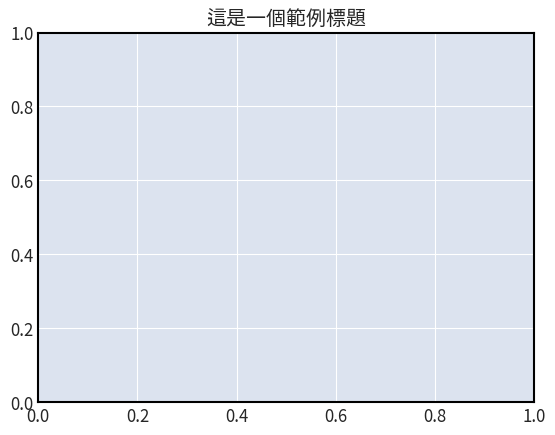

In [32]:
# 繪製範例圖表
plt.title("這是一個範例標題")
plt.show()

# Pandas Shift

In [33]:
temp_df = pd.DataFrame({
    'Date': ['2024-10-11', '2024-10-12', '2024-10-13', '2024-10-14', '2024-10-15', '2024-10-16'],
    'Close': [111, 222, 333, 444, 555, 666]
})
temp_df

,Date,Close
0,2024-10-11,111
1,2024-10-12,222
2,2024-10-13,333
3,2024-10-14,444
4,2024-10-15,555
5,2024-10-16,666


In [34]:
temp_df['Future'] = temp_df['Close'].shift(-1)
temp_df

,Date,Close,Future
0,2024-10-11,111,222.0
1,2024-10-12,222,333.0
2,2024-10-13,333,444.0
3,2024-10-14,444,555.0
4,2024-10-15,555,666.0
5,2024-10-16,666,NaN


In [35]:
temp_df.dropna(inplace=True)
temp_df

,Date,Close,Future
0,2024-10-11,111,222.0
1,2024-10-12,222,333.0
2,2024-10-13,333,444.0
3,2024-10-14,444,555.0
4,2024-10-15,555,666.0


In [36]:
sk_df = pd.DataFrame({
    'Date': ['2024-10-11', '2024-10-12', '2024-10-13', '2024-10-14', '2024-10-15', '2024-10-16'],
    '技術指標1': [111, 222, 333, 444, 555, 666],
    '技術指標2': [111, 222, 333, 444, 555, 666],
    '技術指標3': [111, 222, 333, 444, 555, 666],
    '技術指標4': [111, 222, 333, 444, 555, 666],
    'Close': [356, 363, 368, 370, 374, 366]
})
sk_df

,Date,技術指標1,技術指標2,技術指標3,技術指標4,Close
0,2024-10-11,111,111,111,111,356
1,2024-10-12,222,222,222,222,363
2,2024-10-13,333,333,333,333,368
3,2024-10-14,444,444,444,444,370
4,2024-10-15,555,555,555,555,374
5,2024-10-16,666,666,666,666,366


In [ ]:
n = 3
sk_df.iloc[-n:]

,Date,技術指標1,技術指標2,技術指標3,技術指標4,Close
3,2024-10-14,444,444,444,444,370
4,2024-10-15,555,555,555,555,374
5,2024-10-16,666,666,666,666,366
